# Insurance Claims Data Investigation

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading the Data</a>

<a href=#three>3. Exploratory Data Analysis</a>

<a href=#four>4. Feature Engineering</a>

<a href=#five>5. Export Engineered Dataset</a>

<a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

<a id="two"></a>
## 2. Loading the Data
<a href=#cont>Back to Table of Contents</a>

In [3]:
df = pd.read_csv("Cleaned_Insurance_Data.csv") # Read csv file as pandas dataframe

<a id="three"></a>
## 3. Exploratory Data Analysis
<a href=#cont>Back to Table of Contents</a>

In [4]:
df.head() # Display top 5 rows

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [5]:
df.shape # Check number of entries and features in dataframe

(1000, 39)

We can see that the insurance claims dataset consists of 1000 entries as well as 39 features.

Let us have a look at the names and datatypes for each feature.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

We can see that 18 features are of a numerical datatype (17 integer types and 1 float type) while the remaining 21 features consist of text data values.

We will now investigate the summary statistics for all features of a numerical datatype.

In [7]:
df.describe().T # Transpose results to display feature names more clearly

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.500,276.250,479.00
age,1000.0,3.896300e+01,9.126276e+00,19.00,32.0000,38.000,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.000,759099.750,999435.00
policy_deductable,1000.0,1.134000e+03,6.106692e+02,500.00,500.0000,1000.000,2000.000,2000.00
policy_annual_premium,1000.0,1.257020e+03,2.439092e+02,433.33,1090.5675,1258.415,1415.695,2047.59
umbrella_limit,1000.0,1.103100e+06,2.296444e+06,0.00,0.0000,0.000,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.500,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.000,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.000,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.000,17.000,23.00


**Detecting Null Values**

In [8]:
df.isnull().sum() # Tally the number of null entries in each feature 

months_as_customer              0
age                             0
policy_number                   0
policy_bind_date                0
policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_zip                     0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_date                   0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted          91
incident_state                  0
incident_city                   0
incident_location               0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses     

It seems there is only one feature that contains null values, that feature being `authorities_contacted`.

This is due to the value of "None" being detected as a null value and thus being replaced by "nan" upon reading the dataset into a pandas dataframe.

We can view this feature in closer detail as follows:

In [9]:
df["authorities_contacted"].unique() # Displaying all unique values for the authorities_contacted feature

array(['Police', nan, 'Fire', 'Other', 'Ambulance'], dtype=object)

We will replace all "nan" values in this feature with the string "None" as it was a valid option considering the context of the feature. 

In [10]:
df["authorities_contacted"] = df["authorities_contacted"].fillna("None")

In [11]:
df["authorities_contacted"].unique() # Ensure correct replacement of nan values

array(['Police', 'None', 'Fire', 'Other', 'Ambulance'], dtype=object)

In [12]:
df["authorities_contacted"].isnull().sum() # Ensure null values are no longer present

0

**Search for Anomalous Values**

In [13]:
# Search for features containing the '?' symbol

for col in df.columns:
    
    if "?" in df[col].values:
        print(col)

collision_type
property_damage
police_report_available


The below print statements will display the unique values occuring in the features that were identified above.

In [14]:
print(df["collision_type"].unique())

['Side Collision' '?' 'Rear Collision' 'Front Collision']


In [15]:
print(df["property_damage"].unique())

['YES' '?' 'NO']


In [16]:
print(df["police_report_available"].unique())

['YES' '?' 'NO']


The '?' symbol will be replaced by the string 'Unknown' for the sake of consistency and to align with possible other values in the features in question.

In [17]:
df["collision_type"] = df["collision_type"].replace("?", "Unknown")

In [18]:
df["property_damage"] = df["property_damage"].replace("?", "Unknown")

In [19]:
df["police_report_available"] = df["police_report_available"].replace("?", "Unknown")

In [20]:
print(df["collision_type"].unique()) # Ensuring successful replacement

['Side Collision' 'Unknown' 'Rear Collision' 'Front Collision']


In [21]:
print(df["property_damage"].unique())

['YES' 'Unknown' 'NO']


In [22]:
print(df["police_report_available"].unique())

['YES' 'Unknown' 'NO']


Now that we have cleaned the dataset a bit further, let us take a look at a few key details.

We are interested in the features of the dataset that represent dates. These features include `policy_bind_date` and `incident_date`. However, these features are of the "object" datatype so in order to analyse and visualise them in further detail we will have to convert them to a "datetime" datatype first. This can be seen below:

In [23]:
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['incident_date'] = pd.to_datetime(df['incident_date'])

**Policy Bind Time**

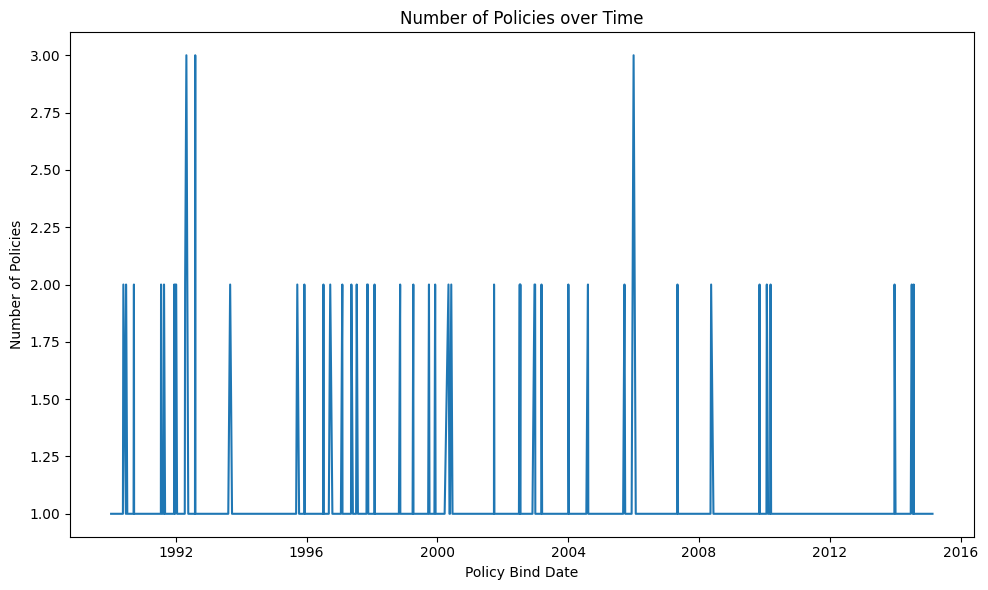

In [24]:
policy_counts = df.groupby('policy_bind_date').size().reset_index(name='policy_count')

plt.figure(figsize=(10, 6))
sns.lineplot(data=policy_counts, x='policy_bind_date', y='policy_count')
plt.xlabel('Policy Bind Date')
plt.ylabel('Number of Policies')
plt.title('Number of Policies over Time')
plt.tight_layout()
plt.show()

In [25]:
print(df["policy_bind_date"].min())
print(df["policy_bind_date"].max())

1990-01-08 00:00:00
2015-02-22 00:00:00


From the lineplot and the minimum and maximum displayed above, we can see that the dataset contains entries for policies created over the span of approximately 25 years.

**Incident Date**

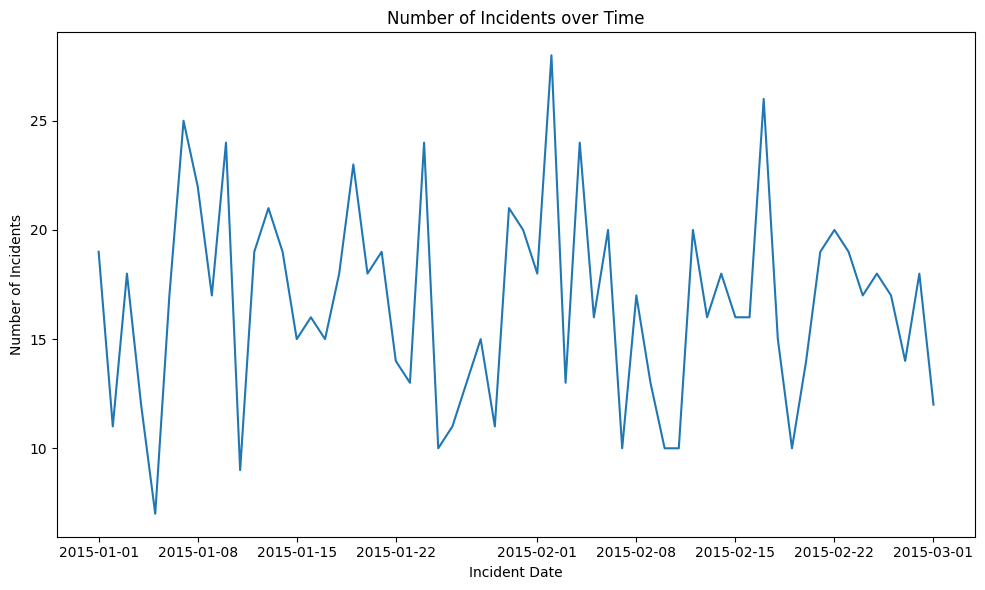

In [26]:
incident_counts = df.groupby('incident_date').size().reset_index(name='incident_count')

plt.figure(figsize=(10, 6))
sns.lineplot(data=incident_counts, x='incident_date', y='incident_count')
plt.xlabel('Incident Date')
plt.ylabel('Number of Incidents')
plt.title('Number of Incidents over Time')
plt.tight_layout()
plt.show()

In [27]:
print(df["incident_date"].min())
print(df["incident_date"].max())

2015-01-01 00:00:00
2015-03-01 00:00:00


In [28]:
df["incident_date"].nunique() # Display number of unique values contained in the incident date feature

60

In [30]:
# Sort dates by number of incident occurrences

sorted_incidents = incident_counts.sort_values("incident_count", ascending=False)

sorted_incidents.head(3)

,incident_date,incident_count
32,2015-02-02,28
47,2015-02-17,26
6,2015-01-07,25


The dataset only contains entries for the first three months of the year 2015. This gives us a glimpse into the time period that the insurance claims data was extracted from. We can also see that there are only 60 unique dates within the three month period with most incidents (28) occurring on the second of February.

**Incidents by Hour**

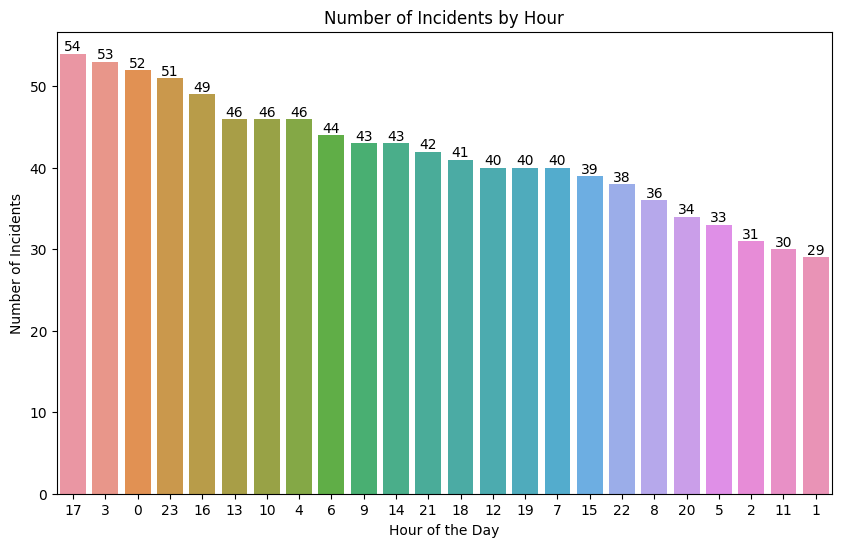

In [31]:
plt.figure(figsize=(10, 6))

ax = sns.countplot(x=df["incident_hour_of_the_day"], order = df["incident_hour_of_the_day"].value_counts().index)

abs_values = df['incident_hour_of_the_day'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values)

plt.xlabel('Hour of the Day')
plt.ylabel('Number of Incidents')
plt.title('Number of Incidents by Hour')

plt.show()

Here we can see that majority of incidents occur at approximately 17:00. This is most likely due to the fact that the time in question is part of peak traffic hours in most cities indicating a higher risk of incidents with increased traffic density.

### 3.1. Count of Observations

#### 3.1.1. Gender of Insured

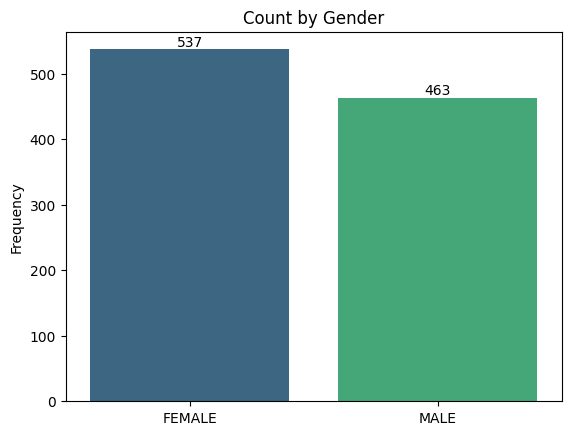

In [32]:
ax = sns.countplot(x=df["insured_sex"], order = df["insured_sex"].value_counts().index, palette="viridis")

abs_values = df['insured_sex'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values)

plt.xlabel('')
plt.ylabel('Frequency')
plt.title('Count by Gender')

plt.show()

From the above countplot we can see that females make up a slight majority of the entries present in the dataset.

#### 3.1.2. Education Level of Insured

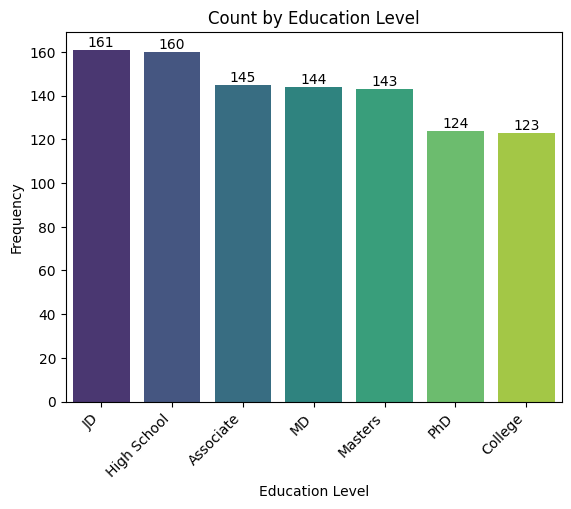

In [33]:
ax = sns.countplot(x=df["insured_education_level"], order=df["insured_education_level"].value_counts().index, palette="viridis")

abs_values = df['insured_education_level'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.title('Count by Education Level')

plt.show()

Leading the count for education level is JD (Juris Doctor potentially) with High School coming in at an extremely close second, with 161 and 160 observations respectively.

On the opposite end of the spectrum are PhD and College degree holders.

#### 3.1.3. Occupation of Insured

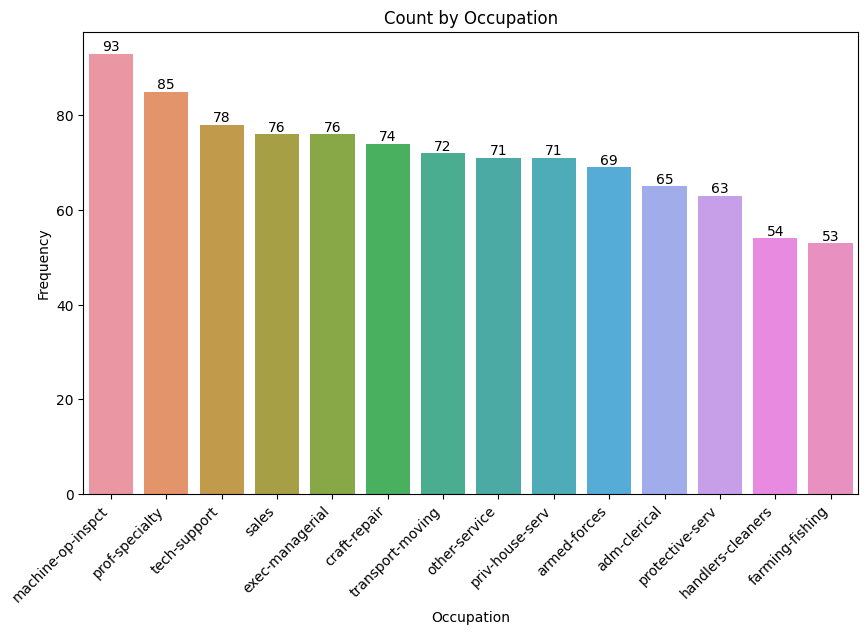

In [34]:
plt.figure(figsize=(10, 6))

ax = sns.countplot(x=df["insured_occupation"], order=df["insured_occupation"].value_counts().index)

abs_values = df['insured_occupation'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.xlabel('Occupation')
plt.ylabel('Frequency')
plt.title('Count by Occupation')

plt.show()

Machine Operator Inspector is the most common occupation, with handlers-cleaners and those in the farming and fishing industry being the least frequent.

#### 3.1.4. Auto Make

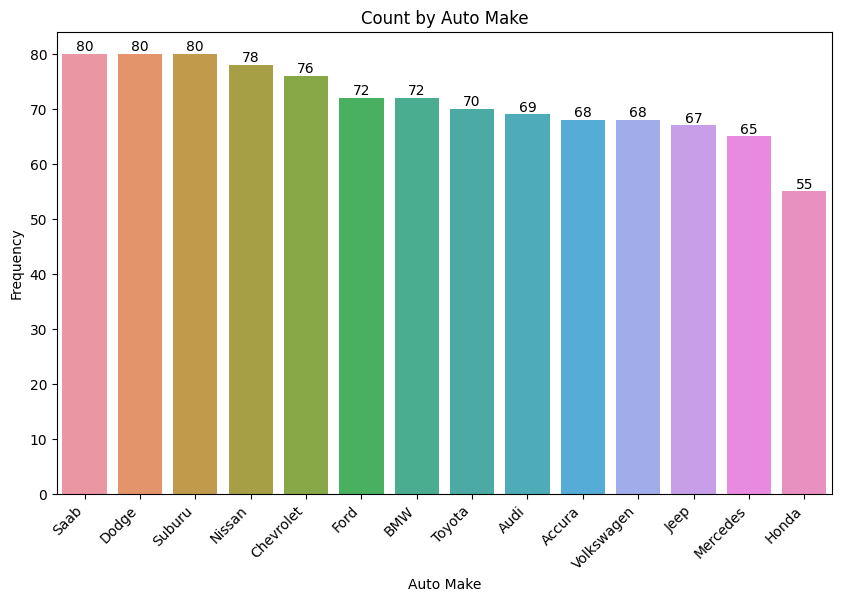

In [35]:
plt.figure(figsize=(10, 6))

ax = sns.countplot(x=df["auto_make"], order=df["auto_make"].value_counts().index)

abs_values = df['auto_make'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.xlabel('Auto Make')
plt.ylabel('Frequency')
plt.title('Count by Auto Make')

plt.show()

Cars of the auto brand Saab, Dodge and Suburu are the most frequently occuring auto make types while Hondas are the least common.  

#### 3.1.5. Incident Type

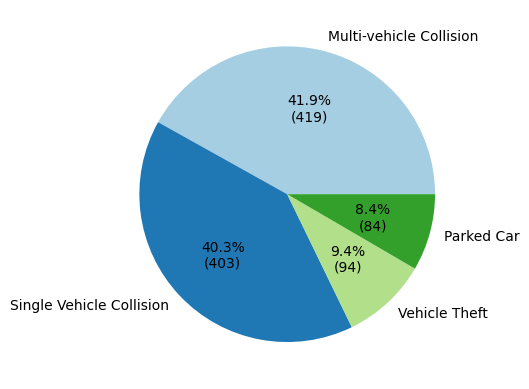

In [36]:
incident_type_counts = df['incident_type'].value_counts()

sns.set_palette("Paired")

plt.pie(incident_type_counts, labels=incident_type_counts.index, 
        autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, p * sum(incident_type_counts) / 100))

plt.show()

From the pie chart above it can be seen that the majority of incidents belong to those involving collisions. Approximately 42% of incidents are multi-vehicle collisions and 40% are collisions involving a single vehicle.

#### 3.1.6. Incident Severity

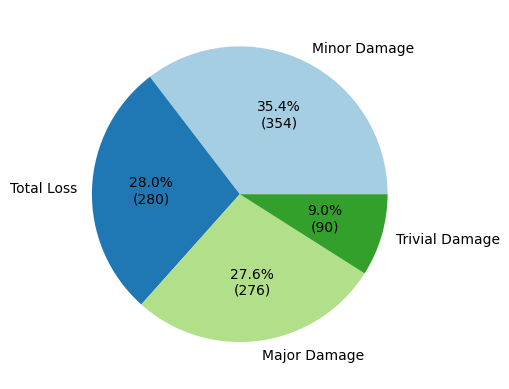

In [37]:
incident_counts = df['incident_severity'].value_counts()

sns.set_palette("Paired")

plt.pie(incident_counts, labels=incident_counts.index, 
        autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, p * sum(incident_counts) / 100))

plt.show()

In terms of incident severity, damage largely results in a minor damage classification (35% of incidents) followed by total loss and major damage at 28% and 27.6% respectively.

#### 3.1.7. Fraud Reported

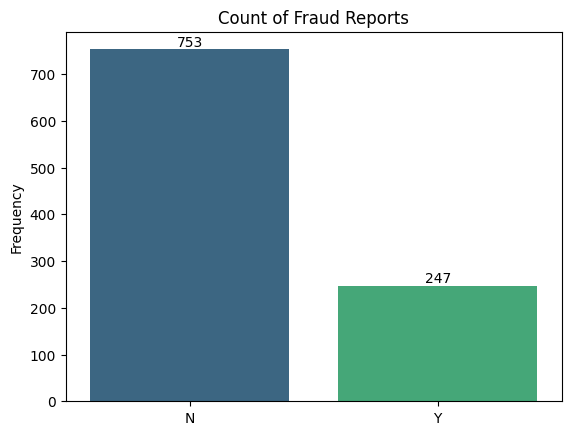

In [38]:
ax = sns.countplot(x=df["fraud_reported"], order = df["fraud_reported"].value_counts().index, palette="viridis")

abs_values = df['fraud_reported'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values)

plt.xlabel('')
plt.ylabel('Frequency')
plt.title('Count of Fraud Reports')

plt.show()

As can be seen from the above figure, there are 247 incident claims that have been reported as fraudulent. This is a significant number as it makes up approximately a quarter of all claims within the dataset. Depending on the claim amounts associated with these potentially fraudulent incident claims it could be a good indication on where a company is losing money.

### 3.2. Investigating Average Total Claim Amount

#### 3.2.1. Average Total Claim Amount Versus Age

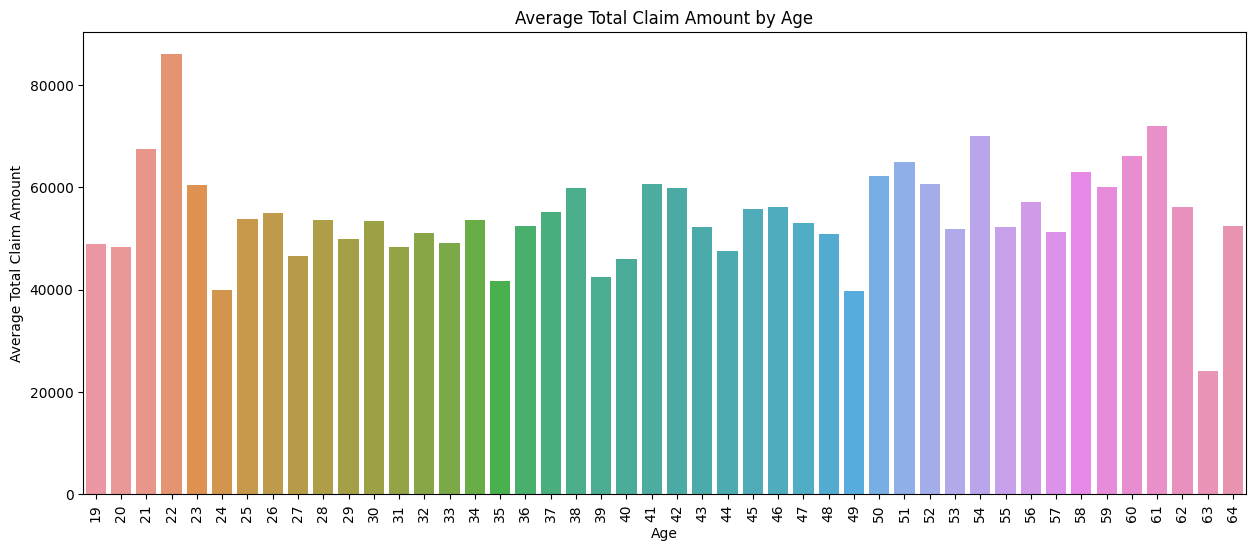

Lowest Average Total Claim Amount is $ 24130.0 at an Age of 63
Highest Average Total Claim Amount is $ 86130.0 at an Age of 22


In [39]:
df_age_group = df[["age","total_claim_amount"]].groupby("age").mean().reset_index()

plt.figure(figsize=(15, 6))

ax = sns.barplot(data=df_age_group, x="age", y="total_claim_amount", errorbar=None)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.ticklabel_format(style='plain', axis='y')

plt.xlabel('Age')
plt.ylabel('Average Total Claim Amount')
plt.title('Average Total Claim Amount by Age')

plt.show()

sorted_age = df_age_group.sort_values("total_claim_amount", ascending=False)

print("Lowest Average Total Claim Amount is $", round(sorted_age.tail(1).iloc[0][1],0), 
     "at an Age of", int(sorted_age.tail(1).iloc[0][0]))
print("Highest Average Total Claim Amount is $", round(sorted_age.head(1).iloc[0][1],0), 
     "at an Age of", int(sorted_age.head(1).iloc[0][0]))

#### 3.2.2. Average Total Claim Amount Versus Gender

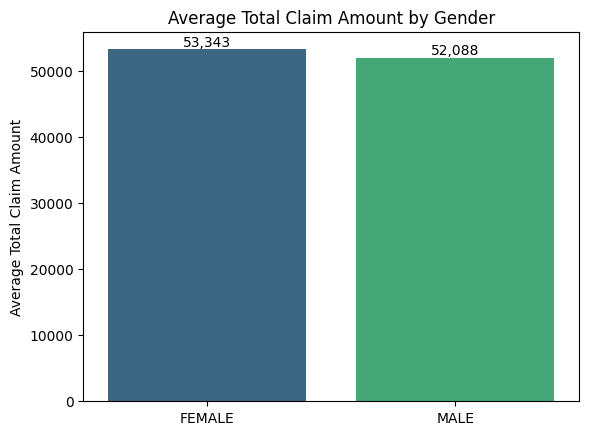

In [40]:
df_sex_group = df[["insured_sex","total_claim_amount"]].groupby("insured_sex").mean().reset_index()

ax = sns.barplot(data=df_sex_group, x="insured_sex", y="total_claim_amount", errorbar=None, palette="viridis")

abs_values = df_sex_group['total_claim_amount'].values

for label in ax.containers:
    ax.bar_label(label, labels=[f'{x:,.0f}' for x in label.datavalues])
    
plt.ticklabel_format(style='plain', axis='y')

plt.xlabel('')
plt.ylabel('Average Total Claim Amount')
plt.title('Average Total Claim Amount by Gender')

plt.show()

From the above barplot, we can see that the average claim amount does not vary significantly with the gender of the claimant.

#### 3.2.3. Average Total Claim Amount Versus Education Level

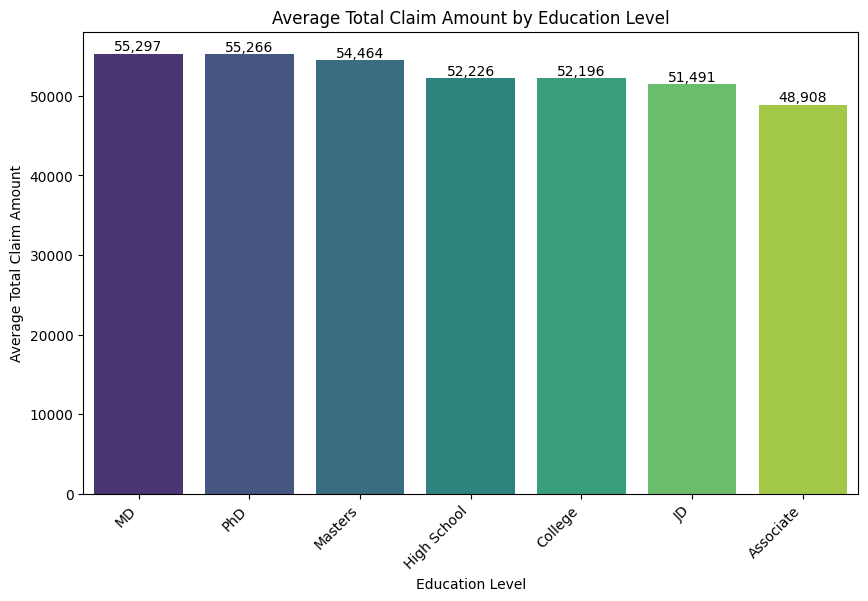

In [41]:
df_edu_group = df[["insured_education_level","total_claim_amount"]].groupby("insured_education_level").mean().reset_index()
df_edu_group = df_edu_group.sort_values(by="total_claim_amount", ascending=False)

plt.figure(figsize=(10, 6))

ax = sns.barplot(data=df_edu_group, x="insured_education_level", y="total_claim_amount", errorbar=None, palette="viridis")

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

for label in ax.containers:
    ax.bar_label(label, labels=[f'{x:,.0f}' for x in label.datavalues])

plt.ticklabel_format(style='plain', axis='y')

plt.xlabel('Education Level')
plt.ylabel('Average Total Claim Amount')
plt.title('Average Total Claim Amount by Education Level')

plt.show()

While the average total claims amount does not differ extensively based on education level, the figure does display a slight trend. 

This is due to the assumption that those with a higher level of education would have higher paying employment thus resulting in a correlation with the value of the assets they have insured (in this case being vehicles).

#### 3.2.4. Average Total Claim Amount Versus Auto Make

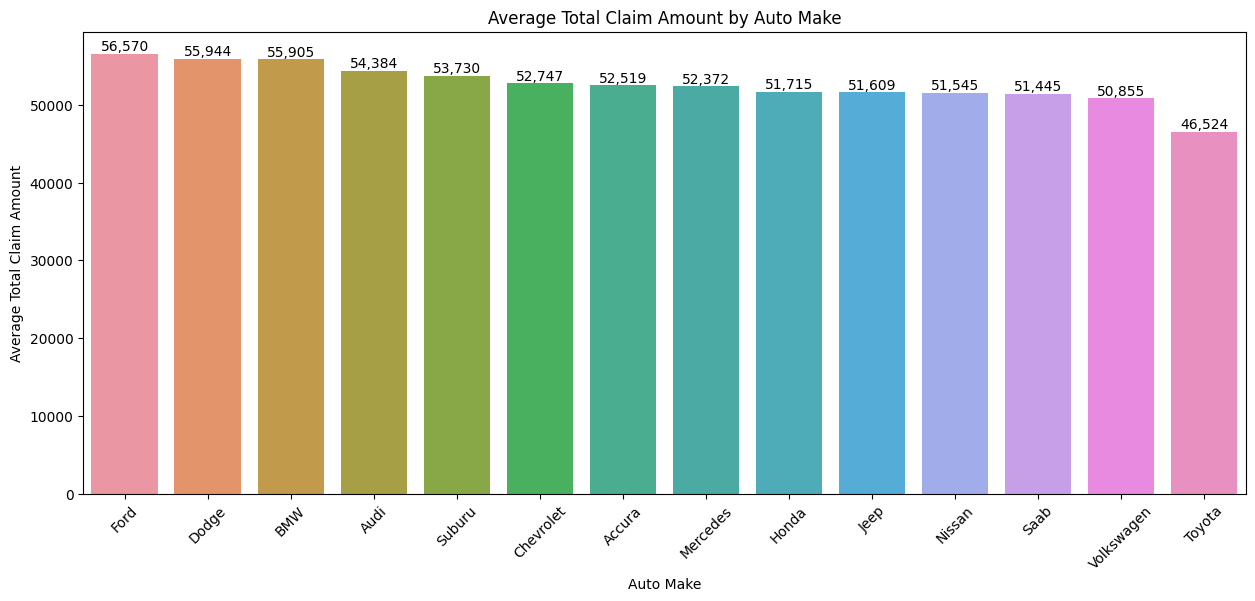

In [42]:
df_auto_group = df[["auto_make","total_claim_amount"]].groupby("auto_make").mean().reset_index()
df_auto_group = df_auto_group.sort_values(by="total_claim_amount", ascending=False)

plt.figure(figsize=(15, 6))

ax = sns.barplot(data=df_auto_group, x="auto_make", y="total_claim_amount", errorbar=None)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

for label in ax.containers:
    ax.bar_label(label, labels=[f'{x:,.0f}' for x in label.datavalues])

plt.ticklabel_format(style='plain', axis='y')

plt.xlabel('Auto Make')
plt.ylabel('Average Total Claim Amount')
plt.title('Average Total Claim Amount by Auto Make')

plt.show()

The above figure can be used as an indication of which vehicles result in the highest average total claim amount. It displays Ford, Dodge, BMW, Audi and Suburu as the top five highest. Incidents involving Toyotas appear to result in the lowest average claim amount.

While this figure looks at the total claim amount we can confirm the findings by looking at vehicle claims specifically.

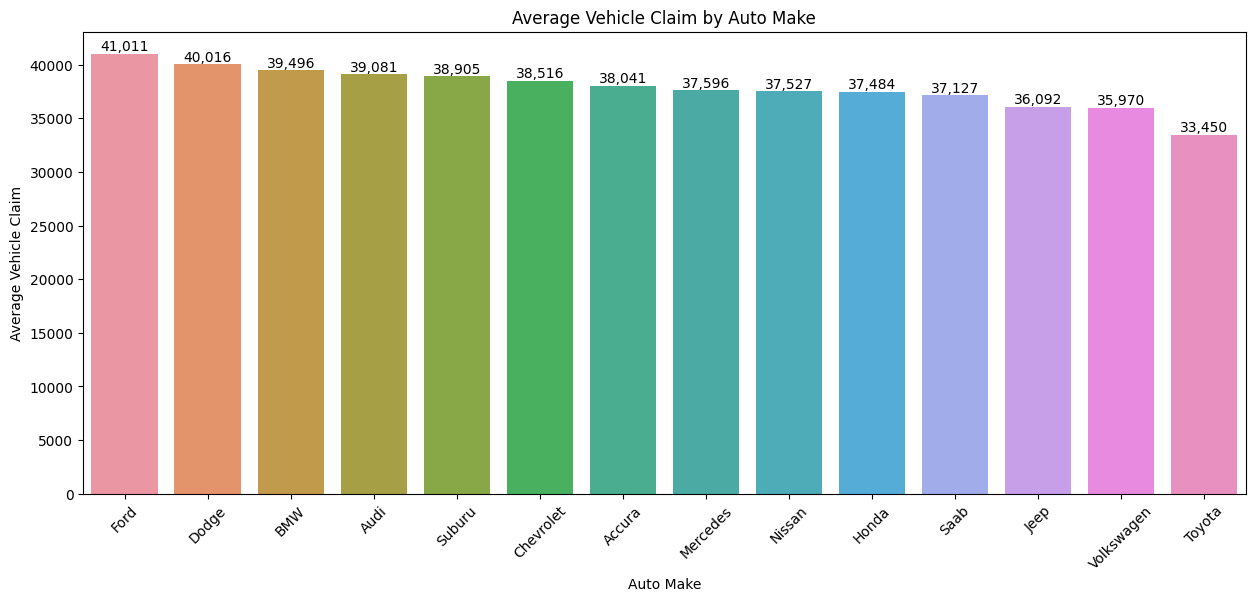

In [43]:
df_auto_group = df[["auto_make","vehicle_claim"]].groupby("auto_make").mean().reset_index()
df_auto_group = df_auto_group.sort_values(by="vehicle_claim", ascending=False)

plt.figure(figsize=(15, 6))

ax = sns.barplot(data=df_auto_group, x="auto_make", y="vehicle_claim", errorbar=None)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

for label in ax.containers:
    ax.bar_label(label, labels=[f'{x:,.0f}' for x in label.datavalues])

plt.ticklabel_format(style='plain', axis='y')

plt.xlabel('Auto Make')
plt.ylabel('Average Vehicle Claim')
plt.title('Average Vehicle Claim by Auto Make')

plt.show()

As we can see the order of auto make remains largely the same. There exists a few rearrangements in the tail end of the ranking but Toyotas still possesses the lowest average claim. The highest five averages also remain steadfast. 

This is also quite possibly an indication that vehicle claims makes up the majority of the total claims amount with injury and property claims making up a less signicant portion. This could be due to the fact that the dataset deals with vehicle insurance primarily and as such does not cover claims involving injuries and property to the same extent.

#### 3.2.5. Average Total Claim Amount Versus Incident Type

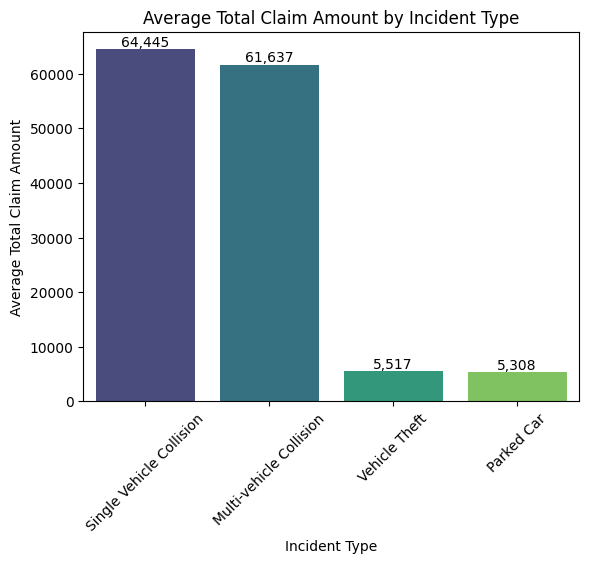

In [44]:
df_inc_type_group = df[["incident_type","total_claim_amount"]].groupby("incident_type").mean().reset_index()
df_inc_type_group = df_inc_type_group.sort_values(by="total_claim_amount", ascending=False)

ax = sns.barplot(data=df_inc_type_group, x="incident_type", y="total_claim_amount", errorbar=None, palette="viridis")

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

for label in ax.containers:
    ax.bar_label(label, labels=[f'{x:,.0f}' for x in label.datavalues])

plt.ticklabel_format(style='plain', axis='y')

plt.xlabel('Incident Type')
plt.ylabel('Average Total Claim Amount')
plt.title('Average Total Claim Amount by Incident Type')

plt.show()

Of the four incident types, it makes sense that incidents involving collisions would result, on average, in the more significant of claims. In this case, single vehicle collisions have a higher average total claim than that of collisions involving multiple vehicles.

#### 3.2.6. Average Total Claim Amount Versus Incident Severity

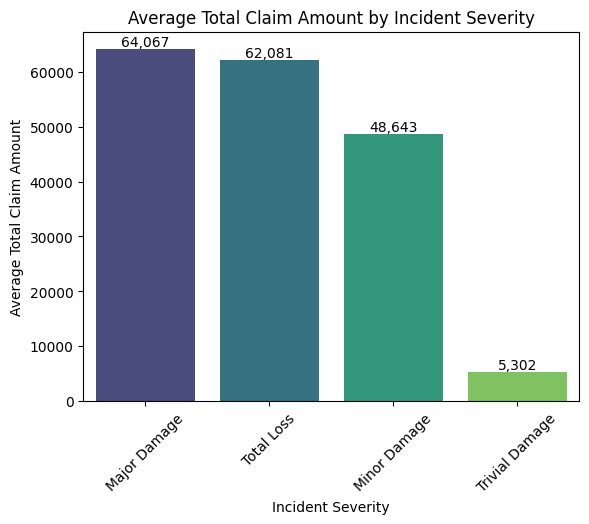

In [45]:
df_inc_sev_group = df[["incident_severity","total_claim_amount"]].groupby("incident_severity").mean().reset_index()
df_inc_sev_group = df_inc_sev_group.sort_values(by="total_claim_amount", ascending=False)

ax = sns.barplot(data=df_inc_sev_group, x="incident_severity", y="total_claim_amount", errorbar=None, palette="viridis")

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

for label in ax.containers:
    ax.bar_label(label, labels=[f'{x:,.0f}' for x in label.datavalues])

plt.ticklabel_format(style='plain', axis='y')

plt.xlabel('Incident Severity')
plt.ylabel('Average Total Claim Amount')
plt.title('Average Total Claim Amount by Incident Severity')

plt.show()

A similar case occurs when investigating total claims with regards to incident severity. As expected, total claims for incidents that are considered in the category of major damage and total loss have the highest average total claim amount. Minor damage incidents, result in an average total claim of approximately 14 000 - 16 000 dollars less than that of the leading severity categories. The average total claim amount for trivial damage is significantly lower than other categories at 5 300 dollars.

### 3.3. Investigating Average Policy Annual Premium

#### 3.3.1. Average Policy Annual Premium Versus Months as a Customer

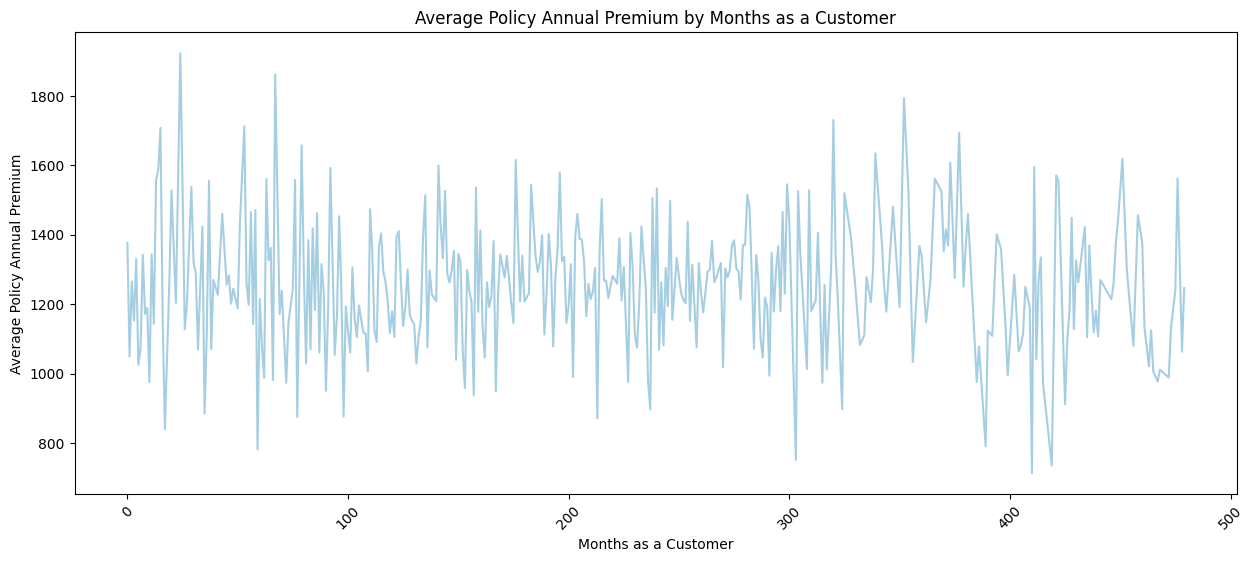

In [49]:
df_months_group = df[["months_as_customer","policy_annual_premium"]].groupby("months_as_customer").mean().reset_index()

plt.figure(figsize=(15, 6))

ax = sns.lineplot(data=df_months_group, x="months_as_customer", y="policy_annual_premium", errorbar=None)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

for label in ax.containers:
    ax.bar_label(label, labels=[f'{x:,.0f}' for x in label.datavalues])

plt.ticklabel_format(style='plain', axis='y')

plt.xlabel('Months as a Customer')
plt.ylabel('Average Policy Annual Premium')
plt.title('Average Policy Annual Premium by Months as a Customer')

plt.show()

In [50]:
print("Least months as a customer:", df['months_as_customer'].min())
print("Most months as a customer:", df['months_as_customer'].max())

Least months as a customer: 0
Most months as a customer: 479


The minimum for the months as a customer feature is 0 which is valid as a customer might have just become a client of the insurance company.

The maximum is 479 months which equates to approximately 40 years.

#### 3.3.2. Average Policy Annual Premium Versus Education Level

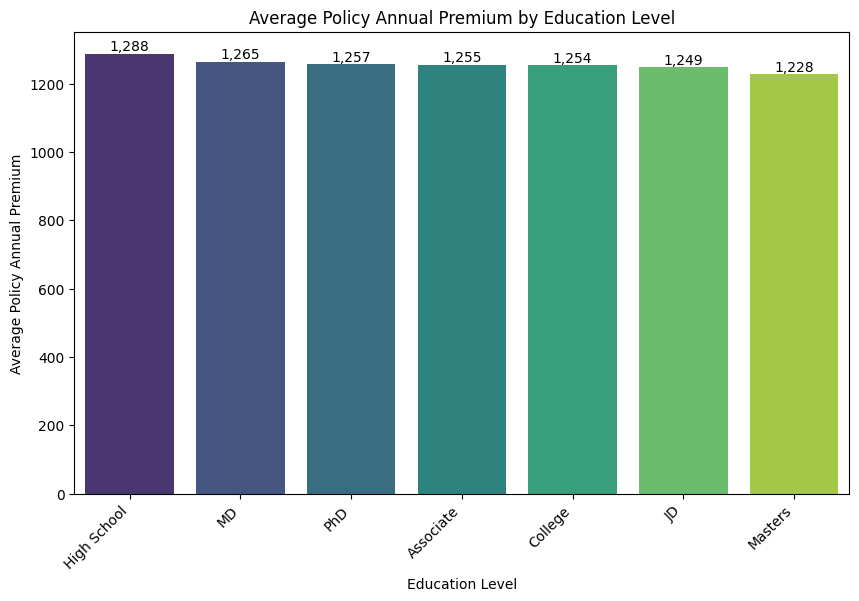

In [51]:
df_edu_group = df[["insured_education_level","policy_annual_premium"]].groupby("insured_education_level").mean().reset_index()
df_edu_group = df_edu_group.sort_values(by="policy_annual_premium", ascending=False)

plt.figure(figsize=(10, 6))

ax = sns.barplot(data=df_edu_group, x="insured_education_level", y="policy_annual_premium", errorbar=None, palette="viridis")

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

for label in ax.containers:
    ax.bar_label(label, labels=[f'{x:,.0f}' for x in label.datavalues])

plt.ticklabel_format(style='plain', axis='y')

plt.xlabel('Education Level')
plt.ylabel('Average Policy Annual Premium')
plt.title('Average Policy Annual Premium by Education Level')

plt.show()

#### 3.3.3. Average Policy Annual Premium Versus Occupation

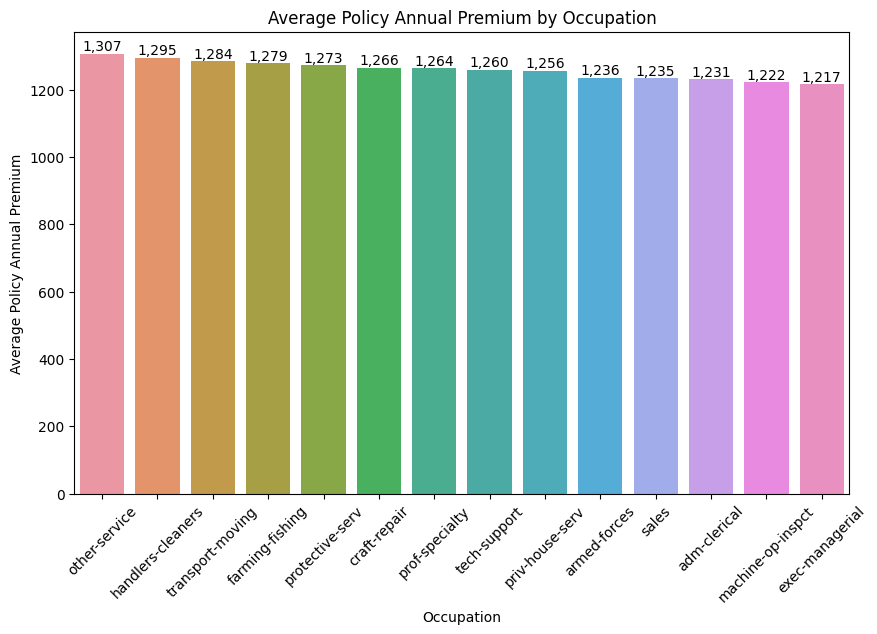

In [52]:
df_occ_group = df[["insured_occupation","policy_annual_premium"]].groupby("insured_occupation").mean().reset_index()
df_occ_group = df_occ_group.sort_values(by="policy_annual_premium", ascending=False)

plt.figure(figsize=(10, 6))

ax = sns.barplot(data=df_occ_group, x="insured_occupation", y="policy_annual_premium", errorbar=None)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

for label in ax.containers:
    ax.bar_label(label, labels=[f'{x:,.0f}' for x in label.datavalues])

plt.ticklabel_format(style='plain', axis='y')

plt.xlabel('Occupation')
plt.ylabel('Average Policy Annual Premium')
plt.title('Average Policy Annual Premium by Occupation')

plt.show()

#### 3.3.4. Average Policy Annual Premium Versus Age

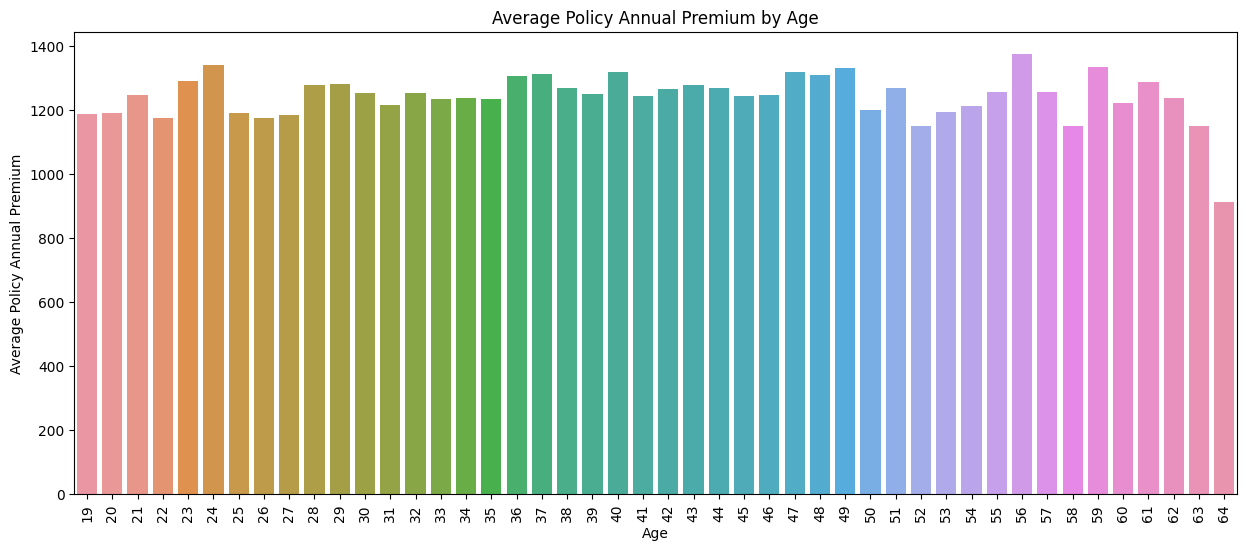

Lowest Average Policy Annual Premium is $ 912.0 at an Age of 64
Highest Average Policy Annual Premium is $ 1375.0 at an Age of 56


In [49]:
df_age_group = df[["age","policy_annual_premium"]].groupby("age").mean().reset_index()

plt.figure(figsize=(15, 6))

ax = sns.barplot(data=df_age_group, x="age", y="policy_annual_premium", errorbar=None)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.ticklabel_format(style='plain', axis='y')

plt.xlabel('Age')
plt.ylabel('Average Policy Annual Premium')
plt.title('Average Policy Annual Premium by Age')

plt.show()

sorted_age = df_age_group.sort_values("policy_annual_premium", ascending=False)

print("Lowest Average Policy Annual Premium is $", round(sorted_age.tail(1).iloc[0][1],0), 
     "at an Age of", int(sorted_age.tail(1).iloc[0][0]))
print("Highest Average Policy Annual Premium is $", round(sorted_age.head(1).iloc[0][1],0), 
     "at an Age of", int(sorted_age.head(1).iloc[0][0]))

#### 3.3.5. Average Policy Annual Premium Versus Auto Make

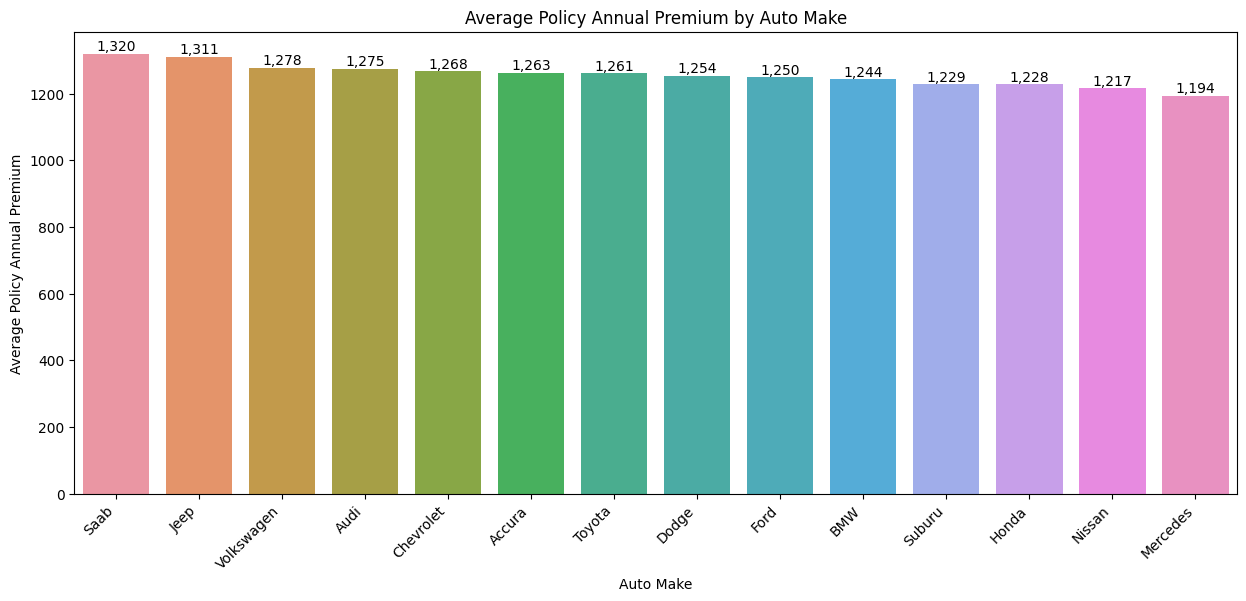

In [86]:
df_car_group = df[["auto_make","policy_annual_premium"]].groupby("auto_make").mean().reset_index()
df_car_group = df_car_group.sort_values(by="policy_annual_premium", ascending=False)

plt.figure(figsize=(15, 6))

ax = sns.barplot(data=df_car_group, x="auto_make", y="policy_annual_premium", errorbar=None)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

for label in ax.containers:
    ax.bar_label(label, labels=[f'{x:,.0f}' for x in label.datavalues])

plt.ticklabel_format(style='plain', axis='y')

plt.xlabel('Auto Make')
plt.ylabel('Average Policy Annual Premium')
plt.title('Average Policy Annual Premium by Auto Make')

plt.show()

#### 3.3.6. Average Policy Annual Premium Versus Policy Deductable

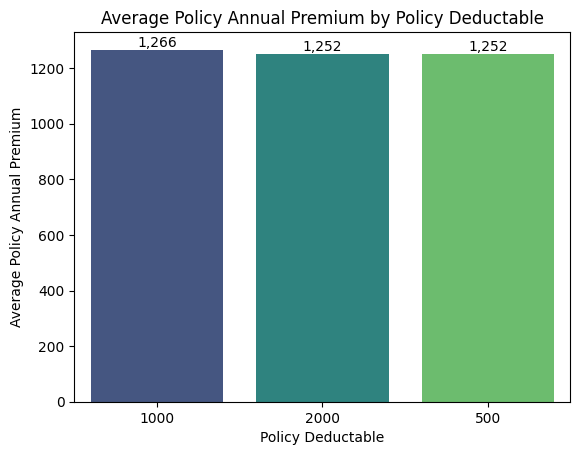

In [87]:
df_deduct_group = df[["policy_deductable","policy_annual_premium"]].groupby("policy_deductable").mean().reset_index()

ax = sns.barplot(data=df_deduct_group, x="policy_deductable", y="policy_annual_premium", errorbar=None, palette="viridis",
                order=df_deduct_group.sort_values('policy_annual_premium', ascending=False).policy_deductable)

for label in ax.containers:
    ax.bar_label(label, labels=[f'{x:,.0f}' for x in label.datavalues])

plt.ticklabel_format(style='plain', axis='y')

plt.xlabel('Policy Deductable')
plt.ylabel('Average Policy Annual Premium')
plt.title('Average Policy Annual Premium by Policy Deductable')

plt.show()

#### 3.3.7. Average Policy Annual Premium Versus Umbrella Limit

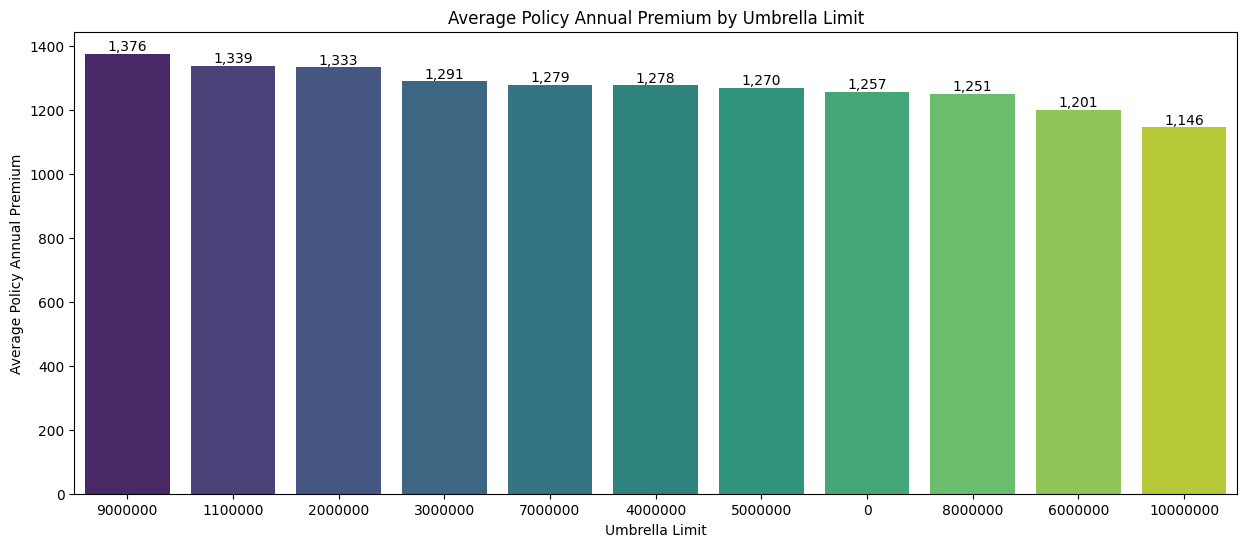

In [50]:
df_umb_group = df[["umbrella_limit","policy_annual_premium"]].groupby("umbrella_limit").mean().reset_index()

plt.figure(figsize=(15, 6))

ax = sns.barplot(data=df_umb_group, x="umbrella_limit", y="policy_annual_premium", errorbar=None, palette="viridis",
                 order=df_umb_group.sort_values('policy_annual_premium', ascending=False).umbrella_limit)

for label in ax.containers:
    ax.bar_label(label, labels=[f'{x:,.0f}' for x in label.datavalues])

plt.ticklabel_format(style='plain', axis='y')

plt.xlabel('Umbrella Limit')
plt.ylabel('Average Policy Annual Premium')
plt.title('Average Policy Annual Premium by Umbrella Limit')

plt.show()

From the above collection of figures meant to indicate the correlation (or lack thereof) of policy annual premiums with various other features, we can there does not exist any strong relationship between the feature in question and features such as age, occupation, education level as well as policy options such umbrella limit and policy deductables.

<a id="four"></a>
## 4. Feature Engineering
<a href=#cont>Back to Table of Contents</a>

In [51]:
df_eng = df.copy() # Make a copy of the dataframe for feature engineering

### 4.1. Date Features

In [52]:
# Extract year, month and day from the datetime feature policy_bind_date

df_eng['policy_bind_year'] = df_eng['policy_bind_date'].dt.year
df_eng['policy_bind_month'] = df_eng['policy_bind_date'].dt.month
df_eng['policy_bind_day'] = df_eng['policy_bind_date'].dt.day

In [53]:
df_eng.head(2)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_year,policy_bind_month,policy_bind_day
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,6510,13020,52080,Saab,92x,2004,Y,2014,10,17
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,780,780,3510,Mercedes,E400,2007,Y,2006,6,27


In [54]:
# Extract year, month and day from the datetime feature incident_date

df_eng['incident_year'] = df_eng['incident_date'].dt.year
df_eng['incident_month'] = df_eng['incident_date'].dt.month
df_eng['incident_day'] = df_eng['incident_date'].dt.day

In [55]:
df_eng[['incident_date', 'incident_year', 'incident_month', 'incident_day']].head(2)

,incident_date,incident_year,incident_month,incident_day
0,2015-01-25,2015,1,25
1,2015-01-21,2015,1,21


### 4.2. Years as Customer

To deem the feature `months_as_customer` more easily digestible, we convert the months to years and store it as a new feature.

In [56]:
df_eng["years_as_customer"] = df_eng["months_as_customer"]/12

In [57]:
df_eng.head(2)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,auto_model,auto_year,fraud_reported,policy_bind_year,policy_bind_month,policy_bind_day,incident_year,incident_month,incident_day,years_as_customer
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,92x,2004,Y,2014,10,17,2015,1,25,27.333333
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,E400,2007,Y,2006,6,27,2015,1,21,19.000000


### 4.3. Age at Customer Join

By using the client age as well as the new `years_as_customer` feature, we can determine the age of the client when they first made use of the insurance company's services. 

In [58]:
df_eng['age_at_customer_join'] =  df_eng['age'] - df_eng['years_as_customer']

In [59]:
df_eng.head(2)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,auto_year,fraud_reported,policy_bind_year,policy_bind_month,policy_bind_day,incident_year,incident_month,incident_day,years_as_customer,age_at_customer_join
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2004,Y,2014,10,17,2015,1,25,27.333333,20.666667
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,2007,Y,2006,6,27,2015,1,21,19.000000,23.000000


### 4.4. Customer Category

For ease of constructing informative visuals and creating relevant filters for business intelligence (done in a PowerBI dashboard), customers can be binned in unique categories such as Short-term Client, Established Client and Long-term Client.

In [60]:
def categorise_customer(customer_term):
    if customer_term < 5:
        return 'Short-term Client'
    elif 5 <= customer_term < 15:
        return 'Established Client'
    else:
        return 'Long-term Client'

In [61]:
df_eng['customer_category'] = df_eng['years_as_customer'].apply(categorise_customer)

In [62]:
df_eng.head(2)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,fraud_reported,policy_bind_year,policy_bind_month,policy_bind_day,incident_year,incident_month,incident_day,years_as_customer,age_at_customer_join,customer_category
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,Y,2014,10,17,2015,1,25,27.333333,20.666667,Long-term Client
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,Y,2006,6,27,2015,1,21,19.000000,23.000000,Long-term Client


In [63]:
df_eng['customer_category'].value_counts()

customer_category
Long-term Client      553
Established Client    346
Short-term Client     101
Name: count, dtype: int64

### 4.5. Age Category

Following the same logic as the above example, clients can be binned according to their age as well.

In [64]:
def categorise_age(age):
    if age < 30:
        return 'Young Adult'
    elif 30 <= age < 60:
        return 'Middle Aged'
    else:
        return 'Elderly'

In [65]:
df_eng['age_category'] = df_eng['age'].apply(categorise_age)

In [66]:
df_eng.head(2)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,policy_bind_year,policy_bind_month,policy_bind_day,incident_year,incident_month,incident_day,years_as_customer,age_at_customer_join,customer_category,age_category
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2014,10,17,2015,1,25,27.333333,20.666667,Long-term Client,Middle Aged
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,2006,6,27,2015,1,21,19.000000,23.000000,Long-term Client,Middle Aged


In [67]:
df_eng['age_category'].value_counts()

age_category
Middle Aged    819
Young Adult    154
Elderly         27
Name: count, dtype: int64

### 4.6. Policy Monthly Premium

As the policy premium is displayed on an annual basis in the dataset, it can be beneficial to have access to the premiums on a monthly basis as well. This conversion is done below.

In [68]:
df_eng['policy_monthly_premium'] = df_eng['policy_annual_premium']/12

In [69]:
df_eng.head(2)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,policy_bind_month,policy_bind_day,incident_year,incident_month,incident_day,years_as_customer,age_at_customer_join,customer_category,age_category,policy_monthly_premium
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,10,17,2015,1,25,27.333333,20.666667,Long-term Client,Middle Aged,117.242500
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,6,27,2015,1,21,19.000000,23.000000,Long-term Client,Middle Aged,99.768333


### 4.7. Total Premiums Paid

By utilising the engineered feature of `policy_monthly_premium` and the original `months as customer` feature, the total premiums paid to the insurance company can be computed for each client.

In [70]:
df_eng['total_premiums_paid'] = df_eng['policy_monthly_premium'] * df_eng['months_as_customer']

In [71]:
df_eng.head(2)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,policy_bind_day,incident_year,incident_month,incident_day,years_as_customer,age_at_customer_join,customer_category,age_category,policy_monthly_premium,total_premiums_paid
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,17,2015,1,25,27.333333,20.666667,Long-term Client,Middle Aged,117.242500,38455.54
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,27,2015,1,21,19.000000,23.000000,Long-term Client,Middle Aged,99.768333,22747.18


### 4.8. Net Value of Customer

The prior feature is then used in combination with the total claim amount for an incident, to calculate the net value of a particular customer to gauge whether the company has made a loss on the claim.

In [72]:
df_eng['net_value_of_customer'] = df_eng['total_premiums_paid'] - df_eng['total_claim_amount']

In [73]:
df_eng.head(2)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,incident_year,incident_month,incident_day,years_as_customer,age_at_customer_join,customer_category,age_category,policy_monthly_premium,total_premiums_paid,net_value_of_customer
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2015,1,25,27.333333,20.666667,Long-term Client,Middle Aged,117.242500,38455.54,-33154.46
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,2015,1,21,19.000000,23.000000,Long-term Client,Middle Aged,99.768333,22747.18,17677.18


In [75]:
df_eng.columns # Take a look at features after feature engineering

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'policy_bind_year',
       'policy_bind_month', 'policy_bind_day', 'incident_year',
       'incident_month', 'incident_day', 'years_as_customer',
       'age_at_customer_join', 'c

In [76]:
df_eng.shape

(1000, 52)

As can we seen from the current shape of the dataframe, we have added 13 new features to the original dataset. These features can now be analysed further in the PowerBI dashboard (included within the same repository that the notebook is located in) to potentially gain more business insights.

In [77]:
df_eng.head(3).T # Transpose to get a view of all features

,0,1,2
months_as_customer,328,228,134
age,48,42,29
policy_number,521585,342868,687698
policy_bind_date,2014-10-17 00:00:00,2006-06-27 00:00:00,2000-09-06 00:00:00
policy_state,OH,IN,OH
policy_csl,250/500,250/500,100/300
policy_deductable,1000,2000,2000
policy_annual_premium,1406.91,1197.22,1413.14
umbrella_limit,0,5000000,5000000
insured_zip,466132,468176,430632


In [78]:
df_eng.describe().T

,count,mean,min,25%,50%,75%,max,std
months_as_customer,1000.0,203.954,0.0,115.75,199.5,276.25,479.0,115.113174
age,1000.0,38.963,19.0,32.0,38.0,44.0,64.0,9.126276
policy_number,1000.0,546238.648,100804.0,335980.25,533135.0,759099.75,999435.0,257063.005276
policy_bind_date,1000,2002-02-08 04:40:47.999999872,1990-01-08 00:00:00,1995-09-19 00:00:00,2002-04-01 12:00:00,2008-04-21 12:00:00,2015-02-22 00:00:00,NaN
policy_deductable,1000.0,1134.0,500.0,500.0,1000.0,2000.0,2000.0,610.669237
policy_annual_premium,1000.0,1257.02011,433.33,1090.5675,1258.415,1415.695,2047.59,243.9092
umbrella_limit,1000.0,1103100.0,0.0,0.0,0.0,0.0,10000000.0,2296443.782034
insured_zip,1000.0,501214.488,430104.0,448404.5,466445.5,603251.0,620962.0,71701.610941
capital-gains,1000.0,25126.1,0.0,0.0,0.0,51025.0,100500.0,27872.187708
capital-loss,1000.0,-26793.7,-111100.0,-51500.0,-23250.0,0.0,0.0,28104.096686


<a id="five"></a>
## 5. Export Engineered Dataset
<a href=#cont>Back to Table of Contents</a>

Now that the feature engineering is finalised, the altered dataframe can be exported as a csv file for further exploration on other platforms.

In [ ]:
df_eng.to_csv('Advanced_Features_Insurance_Data.csv')